In [1]:
#!pip install monai pytorch-gpu nilearn
#from google.colab import drive
#drive.mount('/content/drive')



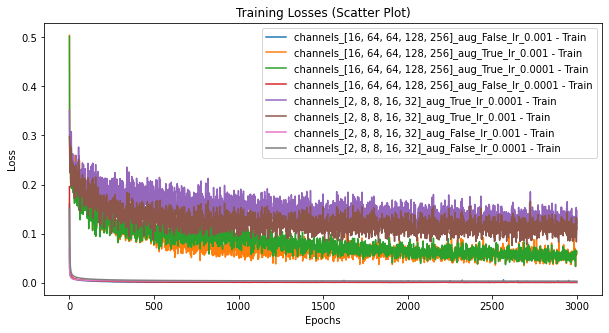

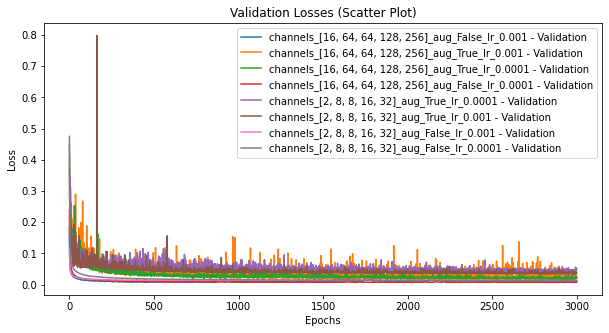

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Your main directory path
main_directory = '/project/ajoshi_27/code_farm/rodbfc/models'

epoch_number = 3000

# Function to extract train and validation losses from a file
def extract_losses(loss_file):
    data = np.load(loss_file)
    return data['train_loss_epoch'], data['val_loss_epoch']

# Lists to store train and validation losses
all_train_losses = []
all_val_losses = []

# Labels for legends
labels = []

# Iterate through subdirectories
for subdir in os.listdir(main_directory):
    subdir_path = os.path.join(main_directory, subdir)

    # Check if it's a directory
    if os.path.isdir(subdir_path):
        # Look for the loss file in the subdirectory
        loss_files = [file for file in os.listdir(subdir_path) if file.startswith('bias_field_correction_loss_') and file.endswith(f'{epoch_number}.npz')]
        if loss_files:
            loss_file_name = os.path.join(subdir_path, loss_files[0])

            # Extract train and validation losses
            train_loss, val_loss = extract_losses(loss_file_name)

            train_loss = train_loss[0:3000]
            val_loss = val_loss[0:3000]
           # min_val_loss_epoch = np.argmin(val_loss)
            min_val_loss_epoch = 3000


            # Append to the lists
            all_train_losses.append((range(len(train_loss)), train_loss, subdir))
            all_val_losses.append((range(len(val_loss)), val_loss, min_val_loss_epoch, subdir))

# Scatter plot for training losses
plt.figure(figsize=(10, 5))
for data in all_train_losses:
    epochs, train_loss, label = data
    plt.plot(epochs, train_loss, label=f'{label} - Train')

plt.title('Training Losses (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add legend for training losses
plt.show()

# Scatter plot for validation losses
plt.figure(figsize=(10, 5))
for data in all_val_losses:
    epochs, val_loss, min_val_loss_epoch, label = data
    plt.plot(epochs, val_loss, label=f'{label} - Validation')

plt.title('Validation Losses (Scatter Plot)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()  # Add legend for validation losses
plt.show()






metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[16, 64, 64, 128, 256]_aug_False_lr_0.001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

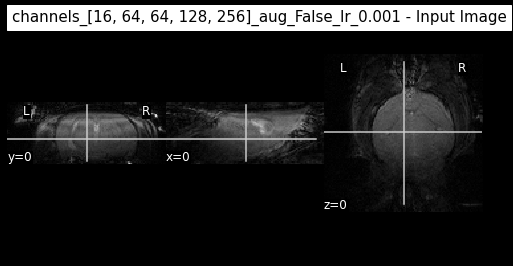

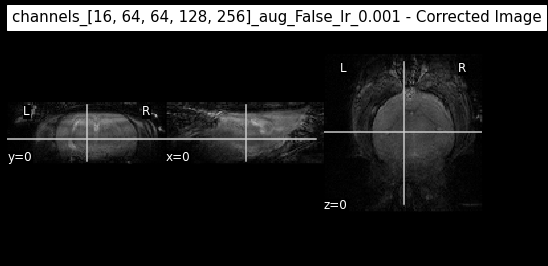

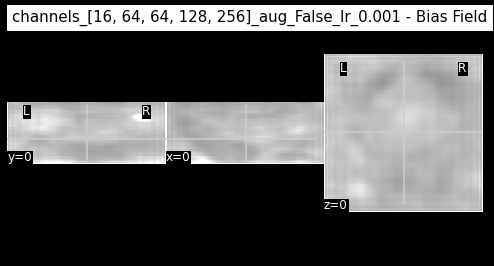

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[16, 64, 64, 128, 256]_aug_True_lr_0.001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

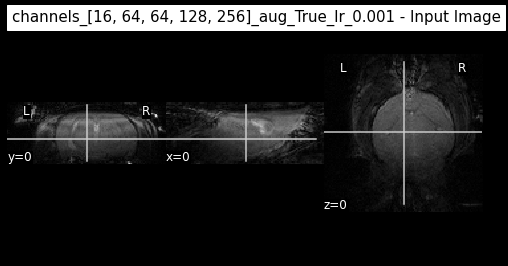

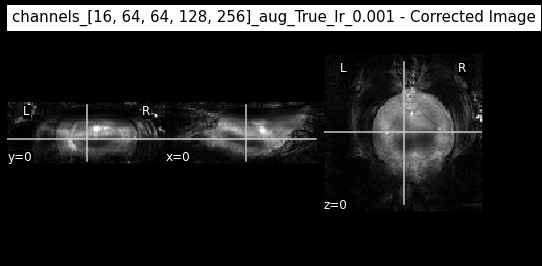

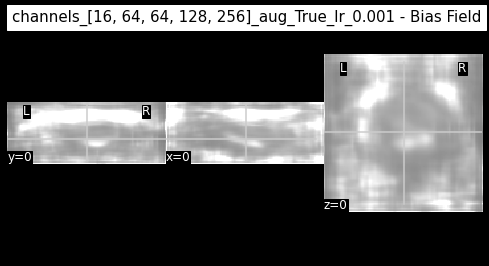

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[16, 64, 64, 128, 256]_aug_True_lr_0.0001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

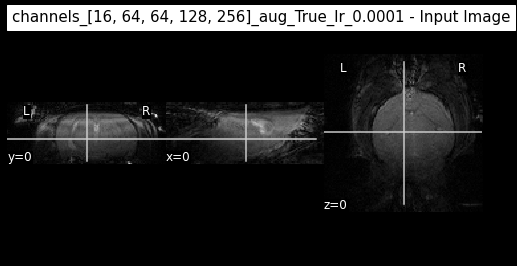

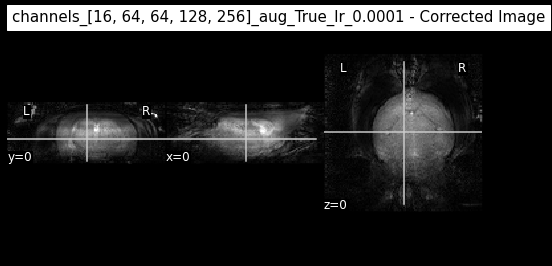

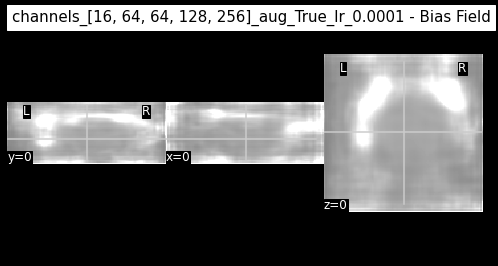

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[16, 64, 64, 128, 256]_aug_False_lr_0.0001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

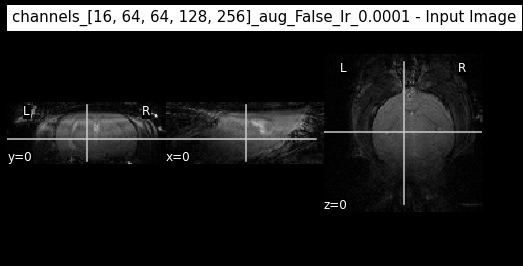

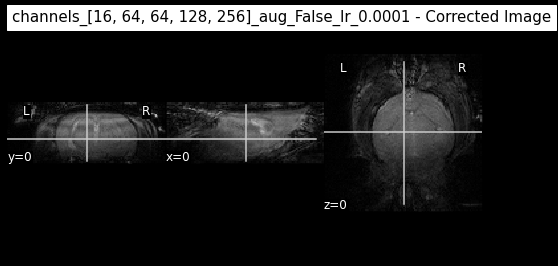

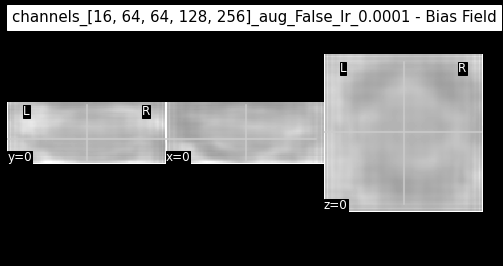

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[2, 8, 8, 16, 32]_aug_True_lr_0.0001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

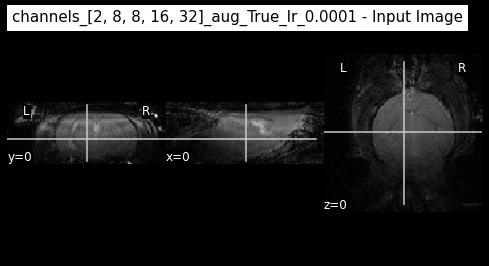

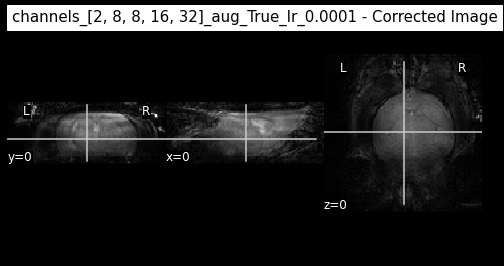

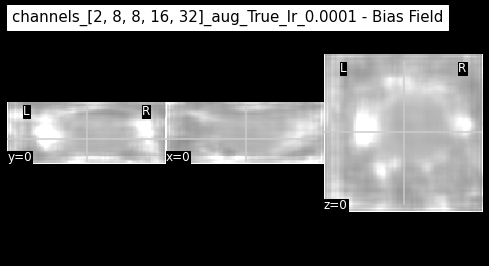

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[2, 8, 8, 16, 32]_aug_True_lr_0.001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

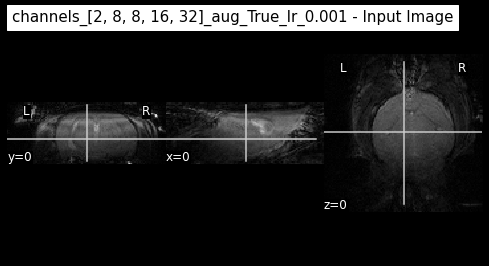

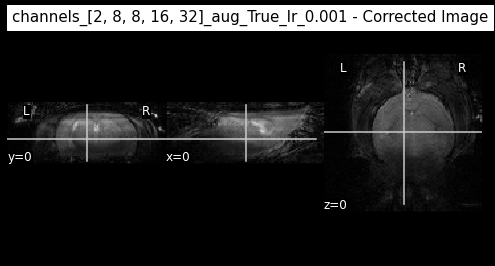

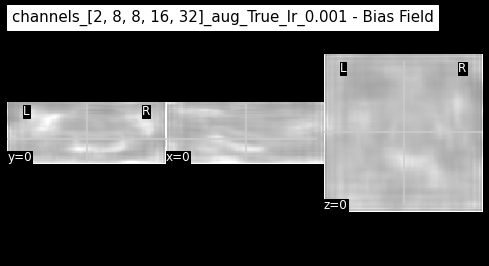

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[2, 8, 8, 16, 32]_aug_False_lr_0.001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

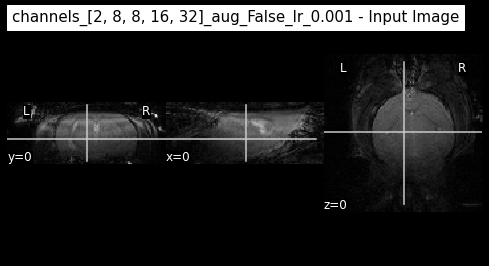

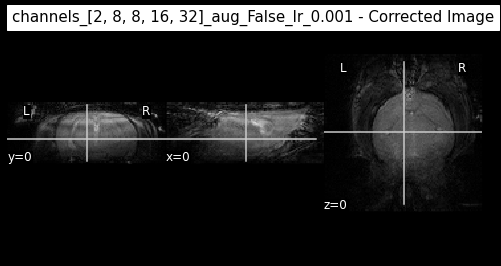

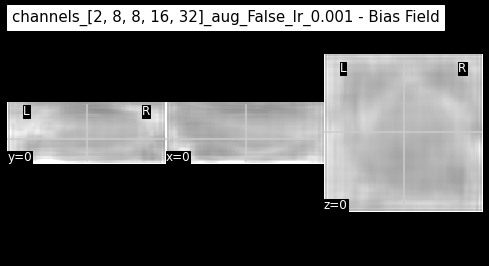

metatensor(0.8034, device='cuda:0') metatensor(0.0007, device='cuda:0')
Done processing for channels_[2, 8, 8, 16, 32]_aug_False_lr_0.0001 - Min Epoch: 3000


<Figure size 432x288 with 0 Axes>

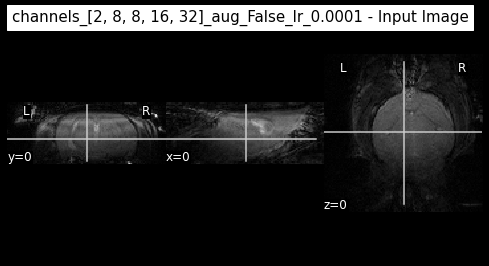

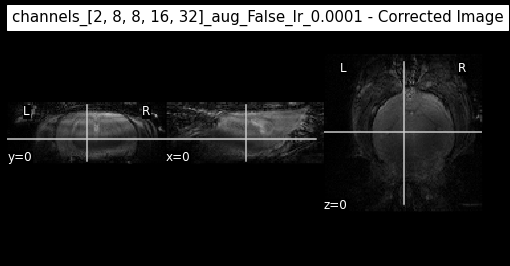

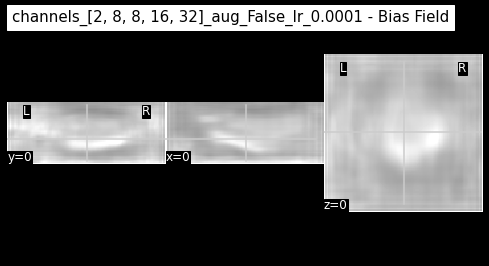

In [3]:
from nilearn.plotting import plot_anat
import nilearn
nilearn.EXPAND_PATH_WILDCARDS = False
# Process each item in all_val_losses
results_directory = "/project/ajoshi_27/code_farm/rodbfc/results"

# Create the results directory if it doesn't exist
if not os.path.exists(results_directory):
    os.makedirs(results_directory)

for i, data in enumerate(all_val_losses):
    epochs, val_loss, min_val_loss_epoch, subdir = data

    # Look for the model file in the subdirectory
    model_files = [file for file in os.listdir(os.path.join(main_directory, subdir)) if file.startswith('bias_field_correction_model_') and file.endswith(f'_{min_val_loss_epoch}.pth')]

    if model_files:
        model_file_name = model_files[0]
        model_file_path = os.path.join(main_directory, subdir, model_file_name)

        # Construct paths for output files with subdir information
        test_image_path = '/project/ajoshi_27/code_farm/rodbfc/sub-002_ses-1_acq-RARE_T2w.nii.gz'  # Use your actual test image name
        subdir_info = subdir.replace(',', '').replace('(', '').replace(')', '').replace(' ', '_')
        output_prefix = f'{subdir_info}_epoch_{min_val_loss_epoch}'


        test_image_name = os.path.splitext(os.path.splitext(os.path.basename(test_image_path))[0])[0]
        test_corrected_image_path = os.path.join(results_directory, f'{test_image_name}_{output_prefix}_corrected.nii.gz')
        bias_file_path = os.path.join(results_directory, f'{test_image_name}_{output_prefix}_bias.nii.gz')


        # Remove existing output files if they exist
        for output_file_path in [test_corrected_image_path, bias_file_path]:
            if os.path.exists(output_file_path):
                os.remove(output_file_path)

        # Run the processing code
        cmd = f'/project/ajoshi_27/code_farm/rodbfc/rodbfc.py -i {test_image_path} -m "{model_file_path}" -o {test_corrected_image_path} -b {bias_file_path}'
        os.system(cmd)


        print(f'Done processing for {subdir} - Min Epoch: {min_val_loss_epoch}')

        # Plotting
        plt.figure()
        #plt.subplot(3, 1, 1)
        plot_anat(test_image_path, title=f'{subdir} - Input Image', vmin=0, vmax=15000, cut_coords=(0, 0, 0))

        #plt.subplot(3, 1, 2)
        plot_anat(test_corrected_image_path, title=f'{subdir} - Corrected Image', vmin=0, vmax=15000, cut_coords=(0, 0, 0))

        #plt.subplot(3, 1, 3)
        plot_anat(bias_file_path, title=f'{subdir} - Bias Field', vmin=-2, vmax=2, cut_coords=(0, 0, 0))

        #plt.tight_layout()
        plt.show()

In [4]:
#import os

#test_image_path = 'sub-002_ses-1_acq-RARE_T2w.nii.gz'
##test_ground_truth_corrected_image_path = 'sub-002_ses-1_acq-RARE_T2w.bfc_new.nii.gz'#3_RC_corr.nii.gz'
#test_corrected_image_path = 'sub-002_ses-1_acq-RARE_T2w.ml.bfc.nii.gz'
#bias_file = 'sub-002_ses-1_acq-RARE_T2w.bias.nii.gz'#3_RC.bias.nii.gz'
#model_file='models/bias_field_correction_model_2024-01-01_19-25-58_epoch_9500.pth'

#cmd = 'rm '+ test_corrected_image_path

#os.system(cmd)
#cmd = '/project/ajoshi_27/code_farm/rodbfc/rodbfc.py -i '+test_image_path + ' -m ' + model_file + ' -o ' + test_corrected_image_path + ' -b ' + bias_file
#os.system(cmd)
#print('done')


In [5]:
#from nilearn.plotting import plot_anat

#plot_anat(test_image_path,title='inout image',vmin=0,vmax=15000,cut_coords=(0,0,0))
#plot_anat(test_corrected_image_path,title='corrected image',vmin=0,vmax=15000,cut_coords=(0,0,0))
##plot_anat(test_ground_truth_corrected_image_path,title='ground truth image',vmin=0,vmax=15000,cut_coords=(0,0,0))
#plot_anat(bias_file,title='bias field', vmin=-2,vmax=2,cut_coords=(0,0,0))